In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker 
import pycountry_convert as pc
import folium
import branca
from datetime import datetime, timedelta,date
from scipy.interpolate import make_interp_spline, BSpline
import plotly.express as px
import json, requests
import calmap
from keras.layers import Input, Dense, Activation, LeakyReLU, Dropout
from keras import models
from keras.optimizers import RMSprop, Adam
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [46]:
# Retriving Dataset
df_confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
df_deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
df_covid19 = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv")
df_table = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_time.csv",parse_dates=['Last_Update'])

In [47]:
df_covid19

Country_Region          Last_Update        Lat      Long_  Confirmed  \
0           Afghanistan  2020-08-14 13:27:25  33.939110  67.709953    37431.0   
1               Albania  2020-08-14 13:27:25  41.153300  20.168300     6971.0   
2               Algeria  2020-08-14 13:27:25  28.033900   1.659600    37187.0   
3               Andorra  2020-08-14 13:27:25  42.506300   1.521800      981.0   
4                Angola  2020-08-14 13:27:25 -11.202700  17.873900     1815.0   
..                  ...                  ...        ...        ...        ...   
183  West Bank and Gaza  2020-08-14 13:27:25  31.952200  35.233200    15834.0   
184      Western Sahara  2020-08-14 13:27:25  24.215500 -12.885800       10.0   
185               Yemen  2020-08-14 13:27:25  15.552727  48.516388     1847.0   
186              Zambia  2020-08-14 13:27:25 -13.133897  27.849332     8663.0   
187            Zimbabwe  2020-08-14 13:27:25 -19.015438  29.154857     4990.0   

     Deaths  Recovered  Active  Incident_Rate  People_Tested  \
0    1363.0    26714.0  9354.0      96.153597            NaN   
1     213.0     3616.0  3142.0     242.233651            NaN   
2    1341.0    26004.0  9842.0      84.803000            NaN   
3      53.0      858.0    70.0    1269.656377            NaN   
4      80.0      577.0  1158.0       5.522379            NaN   
..      ...        ...     ...            ...            ...   
183   106.0     9382.0  6346.0     310.384411            NaN   
184     1.0        8.0     1.0       1.674116            NaN   
185   528.0      949.0   370.0       6.192590            NaN   
186   246.0     7401.0  1016.0      47.122611            NaN   
187   128.0     1927.0  2935.0      33.573468            NaN   

     People_Hospitalized  Mortality_Rate  UID ISO3  
0                    NaN        3.641367    4  AFG  
1                    NaN        3.055516    8  ALB  
2                    NaN        3.606099   12  DZA  
3                    NaN        5.402650   20  AND  
4                    NaN        4.407713   24  AGO  
..                   ...             ...  ...  ...  
183                  NaN        0.669445  275  PSE  
184                  NaN       10.000000  732  ESH  
185                  NaN       28.586898  887  YEM  
186                  NaN        2.839663  894  ZMB  
187                  NaN        2.565130  716  ZWE  

[188 rows x 14 columns]

In [49]:
df_confirmed

Province/State      Country/Region        Lat       Long  1/22/20  \
0              NaN         Afghanistan  33.939110  67.709953        0   
1              NaN             Albania  41.153300  20.168300        0   
2              NaN             Algeria  28.033900   1.659600        0   
3              NaN             Andorra  42.506300   1.521800        0   
4              NaN              Angola -11.202700  17.873900        0   
..             ...                 ...        ...        ...      ...   
261            NaN  West Bank and Gaza  31.952200  35.233200        0   
262            NaN      Western Sahara  24.215500 -12.885800        0   
263            NaN               Yemen  15.552727  48.516388        0   
264            NaN              Zambia -13.133897  27.849332        0   
265            NaN            Zimbabwe -19.015438  29.154857        0   

     1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  8/4/20  8/5/20  8/6/20  \
0          0        0        0        0        0  ...   36782   36829   36896   
1          0        0        0        0        0  ...    5750    5889    6016   
2          0        0        0        0        0  ...   32504   33055   33626   
3          0        0        0        0        0  ...     939     939     944   
4          0        0        0        0        0  ...    1344    1395    1483   
..       ...      ...      ...      ...      ...  ...     ...     ...     ...   
261        0        0        0        0        0  ...   12770   13065   13398   
262        0        0        0        0        0  ...      10      10      10   
263        0        0        0        0        0  ...    1760    1763    1768   
264        0        0        0        0        0  ...    6793    7022    7164   
265        0        0        0        0        0  ...    4221    4221    4339   

     8/7/20  8/8/20  8/9/20  8/10/20  8/11/20  8/12/20  8/13/20  
0     37015   37054   37054    37162    37269    37345    37424  
1      6151    6275    6411     6536     6676     6817     6971  
2     34155   34693   35160    35712    36204    36699    37187  
3       955     955     955      963      963      977      981  
4      1538    1572    1672     1679     1735     1762     1815  
..      ...     ...     ...      ...      ...      ...      ...  
261   13722   13928   14208    14510    14875    15184    15491  
262      10      10      10       10       10       10       10  
263    1796    1797    1804     1832     1831     1841     1847  
264    7486    7903    8085     8210     8275     8501     8663  
265    4451    4575    4649     4748     4818     4893     4990  

[266 rows x 209 columns]

In [50]:
df_table

Country_Region Last_Update  Confirmed  Deaths  Recovered  Active  \
0        Afghanistan  2020-01-22          0       0        NaN     NaN   
1        Afghanistan  2020-01-23          0       0        NaN     NaN   
2        Afghanistan  2020-01-24          0       0        NaN     NaN   
3        Afghanistan  2020-01-25          0       0        NaN     NaN   
4        Afghanistan  2020-01-26          0       0        NaN     NaN   
...              ...         ...        ...     ...        ...     ...   
50425             US  2020-08-09       3050      28        NaN     NaN   
50426             US  2020-08-10       3042      28        NaN     NaN   
50427             US  2020-08-11       3073      29        NaN     NaN   
50428             US  2020-08-12       3086      29        NaN     NaN   
50429             US  2020-08-13       3119      30        NaN     NaN   

       Delta_Confirmed  Delta_Recovered  Incident_Rate  People_Tested  \
0                  0.0              NaN       0.000000            NaN   
1                  0.0              NaN       0.000000            NaN   
2                  0.0              NaN       0.000000            NaN   
3                  0.0              NaN       0.000000            NaN   
4                  0.0              NaN       0.000000            NaN   
...                ...              ...            ...            ...   
50425             35.0              NaN   44030.604879            NaN   
50426              NaN              NaN   43915.114768            NaN   
50427             31.0              NaN   44362.638949            NaN   
50428             13.0              NaN   44550.310380            NaN   
50429             33.0              NaN   45026.707088            NaN   

       People_Hospitalized Province_State  FIPS       UID iso3  \
0                      NaN            NaN   NaN         4  AFG   
1                      NaN            NaN   NaN         4  AFG   
2                      NaN            NaN   NaN         4  AFG   
3                      NaN            NaN   NaN         4  AFG   
4                      NaN            NaN   NaN         4  AFG   
...                    ...            ...   ...       ...  ...   
50425                  NaN        Wyoming  56.0  84000056  USA   
50426                  NaN        Wyoming  56.0  84000056  USA   
50427                  NaN        Wyoming  56.0  84000056  USA   
50428                  NaN        Wyoming  56.0  84000056  USA   
50429                  NaN        Wyoming  56.0  84000056  USA   

      Report_Date_String  Delta_Deaths  
0             2020/01/22           0.0  
1             2020/01/23           0.0  
2             2020/01/24           0.0  
3             2020/01/25           0.0  
4             2020/01/26           0.0  
...                  ...           ...  
50425         2020/08/09           0.0  
50426         2020/08/10           0.0  
50427         2020/08/11           1.0  
50428         2020/08/12           0.0  
50429         2020/08/13           1.0  

[50430 rows x 17 columns]

In [48]:
# new dataset 
df_covid19 = df_covid19.drop(["People_Tested","People_Hospitalized","UID","ISO3","Mortality_Rate"],axis =1)
df_covid19

Country_Region          Last_Update        Lat      Long_  Confirmed  \
0           Afghanistan  2020-08-14 13:27:25  33.939110  67.709953    37431.0   
1               Albania  2020-08-14 13:27:25  41.153300  20.168300     6971.0   
2               Algeria  2020-08-14 13:27:25  28.033900   1.659600    37187.0   
3               Andorra  2020-08-14 13:27:25  42.506300   1.521800      981.0   
4                Angola  2020-08-14 13:27:25 -11.202700  17.873900     1815.0   
..                  ...                  ...        ...        ...        ...   
183  West Bank and Gaza  2020-08-14 13:27:25  31.952200  35.233200    15834.0   
184      Western Sahara  2020-08-14 13:27:25  24.215500 -12.885800       10.0   
185               Yemen  2020-08-14 13:27:25  15.552727  48.516388     1847.0   
186              Zambia  2020-08-14 13:27:25 -13.133897  27.849332     8663.0   
187            Zimbabwe  2020-08-14 13:27:25 -19.015438  29.154857     4990.0   

     Deaths  Recovered  Active  Incident_Rate  
0    1363.0    26714.0  9354.0      96.153597  
1     213.0     3616.0  3142.0     242.233651  
2    1341.0    26004.0  9842.0      84.803000  
3      53.0      858.0    70.0    1269.656377  
4      80.0      577.0  1158.0       5.522379  
..      ...        ...     ...            ...  
183   106.0     9382.0  6346.0     310.384411  
184     1.0        8.0     1.0       1.674116  
185   528.0      949.0   370.0       6.192590  
186   246.0     7401.0  1016.0      47.122611  
187   128.0     1927.0  2935.0      33.573468  

[188 rows x 9 columns]

In [4]:
df_confirmed.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  8/4/20  8/5/20  8/6/20  8/7/20  \
0        0        0        0        0  ...   36782   36829   36896   37015   
1        0        0        0        0  ...    5750    5889    6016    6151   
2        0        0        0        0  ...   32504   33055   33626   34155   
3        0        0        0        0  ...     939     939     944     955   
4        0        0        0        0  ...    1344    1395    1483    1538   

   8/8/20  8/9/20  8/10/20  8/11/20  8/12/20  8/13/20  
0   37054   37054    37162    37269    37345    37424  
1    6275    6411     6536     6676     6817     6971  
2   34693   35160    35712    36204    36699    37187  
3     955     955      963      963      977      981  
4    1572    1672     1679     1735     1762     1815  

[5 rows x 209 columns]

In [5]:
df_confirmed = df_confirmed.rename(columns={"Province/State":"state","Country/Region": "country"})
df_deaths = df_deaths.rename(columns={"Province/State":"state","Country/Region": "country"})
df_covid19 = df_covid19.rename(columns={"Country_Region": "country"})
df_covid19["Active"] = df_covid19["Confirmed"]-df_covid19["Recovered"]-df_covid19["Deaths"]
# df_recovered = df_recovered.rename(columns={"Province/State":"state","Country/Region": "country"})

In [6]:
# getting all countries
countries = np.asarray(df_confirmed["country"])
countries1 = np.asarray(df_covid19["country"])
# Continent_code to Continent_names
continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU' : 'Europe',
    'na' : 'Others'
}


In [7]:
# Defininng Function for getting continent code for country.
def country_to_continent_code(country):
    try:
        return pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(country))
    except :
        return 'na'


In [8]:
#Collecting Continent Information
df_confirmed.insert(2,"continent", [continents[country_to_continent_code(country)] for country in countries[:]])
df_deaths.insert(2,"continent",  [continents[country_to_continent_code(country)] for country in countries[:]])
df_covid19.insert(1,"continent",  [continents[country_to_continent_code(country)] for country in countries1[:]])
df_table.insert(1,"continent",  [continents[country_to_continent_code(country)] for country in df_table["Country_Region"].values])
# df_recovered.insert(2,"continent",  [continents[country_to_continent_code(country)] for country in countries[:]] )   

In [9]:
df_table = df_table[df_table["continent"] != "Others"]

In [10]:
df_deaths[df_deaths["continent" ]== 'Others']

state              country continent        Lat        Long  1/22/20  \
34    NaN                Burma    Others  21.916200   95.956000        0   
91    NaN  Congo (Brazzaville)    Others  -0.228000   15.827700        0   
92    NaN     Congo (Kinshasa)    Others  -4.038300   21.758700        0   
94    NaN        Cote d'Ivoire    Others   7.540000   -5.547100        0   
102   NaN     Diamond Princess    Others   0.000000    0.000000        0   
139   NaN             Holy See    Others  41.902900   12.453400        0   
155   NaN         Korea, South    Others  35.907757  127.766922        0   
156   NaN               Kosovo    Others  42.602636   20.902977        0   
168   NaN           MS Zaandam    Others   0.000000    0.000000        0   
233   NaN              Taiwan*    Others  23.700000  121.000000        0   
237   NaN          Timor-Leste    Others  -8.874217  125.727539        0   
242   NaN                   US    Others  40.000000 -100.000000        0   
261   NaN   West Bank and Gaza    Others  31.952200   35.233200        0   
262   NaN       Western Sahara    Others  24.215500  -12.885800        0   

     1/23/20  1/24/20  1/25/20  1/26/20  ...  8/4/20  8/5/20  8/6/20  8/7/20  \
34         0        0        0        0  ...       6       6       6       6   
91         0        0        0        0  ...      58      58      58      58   
92         0        0        0        0  ...     215     215     215     218   
94         0        0        0        0  ...     103     103     103     104   
102        0        0        0        0  ...      13      13      13      13   
139        0        0        0        0  ...       0       0       0       0   
155        0        0        0        0  ...     302     302     303     304   
156        0        0        0        0  ...     296     296     300     303   
168        0        0        0        0  ...       2       2       2       2   
233        0        0        0        0  ...       7       7       7       7   
237        0        0        0        0  ...       0       0       0       0   
242        0        0        0        0  ...  157482  158854  160104  161347   
261        0        0        0        0  ...      86      89      92      94   
262        0        0        0        0  ...       1       1       1       1   

     8/8/20  8/9/20  8/10/20  8/11/20  8/12/20  8/13/20  
34        6       6        6        6        6        6  
91       58      58       58       60       60       60  
92      218     224      224      225      225      234  
94      104     105      105      105      105      107  
102      13      13       13       13       13       13  
139       0       0        0        0        0        0  
155     305     305      305      305      305      305  
156     303     303      341      341      341      365  
168       2       2        2        2        2        2  
233       7       7        7        7        7        7  
237       0       0        0        0        0        0  
242  162423  162938   163463   164527   166034   167110  
261      96      97      100      104      105      106  
262       1       1        1        1        1        1  

[14 rows x 210 columns]

In [11]:
df_confirmed = df_confirmed.replace(np.nan, '', regex=True)
df_deaths = df_deaths.replace(np.nan, '', regex=True)

In [12]:
def plot_params(ax,axis_label= None, plt_title = None,label_size=15, axis_fsize = 15, title_fsize = 20, scale = 'linear' ):
    # Tick-Parameters
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.tick_params(which='both', width=1,labelsize=label_size)
    ax.tick_params(which='major', length=6)
    ax.tick_params(which='minor', length=3, color='0.8')
    
    # Grid
    plt.grid(lw = 1, ls = '-', c = "0.7", which = 'major')
    plt.grid(lw = 1, ls = '-', c = "0.9", which = 'minor')

    # Plot Title
    plt.title( plt_title,{'fontsize':title_fsize})
    
    # Yaxis sacle
    plt.yscale(scale)
    plt.minorticks_on()
    # Plot Axes Labels
    xl = plt.xlabel(axis_label[0],fontsize = axis_fsize)
    yl = plt.ylabel(axis_label[1],fontsize = axis_fsize)
   

In [13]:
def visualize_covid_cases(confirmed, deaths, continent=None , country = None , state = None, period = None, figure = None, scale = "linear"):
    x = 0
    if figure == None:
        f = plt.figure(figsize=(10,10))
        # Sub plot
        ax = f.add_subplot(111)
    else :
        f = figure[0]
        # Sub plot
        ax = f.add_subplot(figure[1],figure[2],figure[3])
    ax.set_axisbelow(True)
    plt.tight_layout(pad=10, w_pad=5, h_pad=5)
    
    stats = [confirmed, deaths]
    label = ["Confirmed", "Deaths"]
    
    if continent != None:
        params = ["continent",continent]
    elif country != None:
        params = ["country",country]
    else: 
        params = ["All", "All"]
    color = ["darkcyan","crimson"]
    marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=4, markerfacecolor='#ffffff')
    for i,stat in enumerate(stats):
        if params[1] == "All" :
            cases = np.sum(np.asarray(stat.iloc[:,5:]),axis = 0)[x:]
        else :
            cases = np.sum(np.asarray(stat[stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        date = np.arange(1,cases.shape[0]+1)[x:]
        plt.plot(date,cases,label = label[i]+" (Total : "+str(cases[-1])+")",color=color[i],**marker_style)
        plt.fill_between(date,cases,color=color[i],alpha=0.3)

    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(stats[0].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1].iloc[:,5:]),axis = 0)[x:]
    else :
        Total_confirmed =  np.sum(np.asarray(stats[0][stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1][stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        

    
    # Plot Axes Labels
    axis_label = ["Days","No of Cases"]
    
    # Plot Parameters
    plot_params(ax,axis_label,scale = scale)
    
    # Plot Title
    if params[1] == "All" :
        plt.title("COVID-19 Cases World",{'fontsize':25})
    else:   
        plt.title("COVID-19: "+params[1] ,{'fontsize':25})
        
    # Legend Location
    l = plt.legend(loc= "best",fontsize = 15)
    
    if figure == None:
        plt.show()

In [14]:
def get_total_cases(cases, country = "All"):
    if(country == "All") :
        return np.sum(np.asarray(cases.iloc[:,5:]),axis = 0)[-1]
    else :
        return np.sum(np.asarray(cases[cases["country"] == country].iloc[:,5:]),axis = 0)[-1]

In [15]:
def get_mortality_rate(confirmed,deaths, continent = None, country = None):
    if continent != None:
        params = ["continent",continent]
    elif country != None:
        params = ["country",country]
    else :
        params = ["All", "All"]
    
    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(confirmed.iloc[:,5:]),axis = 0)
        Total_deaths = np.sum(np.asarray(deaths.iloc[:,5:]),axis = 0)
        mortality_rate = np.round((Total_deaths/(Total_confirmed+1.01))*100,2)
    else :
        Total_confirmed =  np.sum(np.asarray(confirmed[confirmed[params[0]] == params[1]].iloc[:,5:]),axis = 0)
        Total_deaths = np.sum(np.asarray(deaths[deaths[params[0]] == params[1]].iloc[:,5:]),axis = 0)
        mortality_rate = np.round((Total_deaths/(Total_confirmed+1.01))*100,2)
    
    return np.nan_to_num(mortality_rate)

In [16]:
def dd(date1,date2):
    return (datetime.strptime(date1,'%m/%d/%y') - datetime.strptime(date2,'%m/%d/%y')).days


out = ""#+"output/"

In [17]:
df_covid19.head()

country continent          Last_Update       Lat      Long_  Confirmed  \
0  Afghanistan      Asia  2020-08-14 13:27:25  33.93911  67.709953    37431.0   
1      Albania    Europe  2020-08-14 13:27:25  41.15330  20.168300     6971.0   
2      Algeria    Africa  2020-08-14 13:27:25  28.03390   1.659600    37187.0   
3      Andorra    Europe  2020-08-14 13:27:25  42.50630   1.521800      981.0   
4       Angola    Africa  2020-08-14 13:27:25 -11.20270  17.873900     1815.0   

   Deaths  Recovered  Active  Incident_Rate  
0  1363.0    26714.0  9354.0      96.153597  
1   213.0     3616.0  3142.0     242.233651  
2  1341.0    26004.0  9842.0      84.803000  
3    53.0      858.0    70.0    1269.656377  
4    80.0      577.0  1158.0       5.522379

In [18]:
df_countries_cases = df_covid19.copy().drop(['Lat','Long_','continent','Last_Update'],axis =1)
df_countries_cases.index = df_countries_cases["country"]
df_countries_cases = df_countries_cases.drop(['country'],axis=1)

df_continents_cases = df_covid19.copy().drop(['Lat','Long_','country','Last_Update'],axis =1)
df_continents_cases = df_continents_cases.groupby(["continent"]).sum()

df_countries_cases.fillna(0,inplace=True)
df_continents_cases.fillna(0,inplace=True)

In [19]:
df_continents_cases.style.background_gradient(cmap='Blues',subset=["Confirmed"])\
                        .background_gradient(cmap='Reds',subset=["Deaths"])\
                        .background_gradient(cmap='Greens',subset=["Recovered"])\
                        .background_gradient(cmap='Purples',subset=["Active"])\
                        .format("{:.0f}",subset=["Confirmed","Deaths","Recovered","Active"])

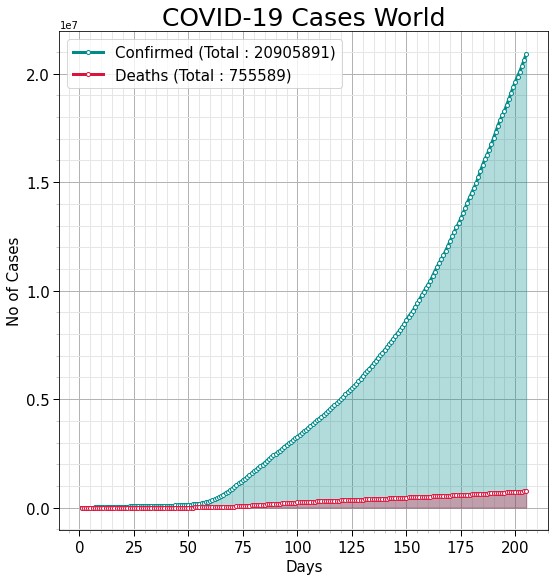

In [20]:
cols = 1
rows = 1
f = plt.figure(figsize=(10,10*rows))

visualize_covid_cases(df_confirmed, df_deaths,continent = "All",figure = [f,rows,cols, 1])

plt.show()

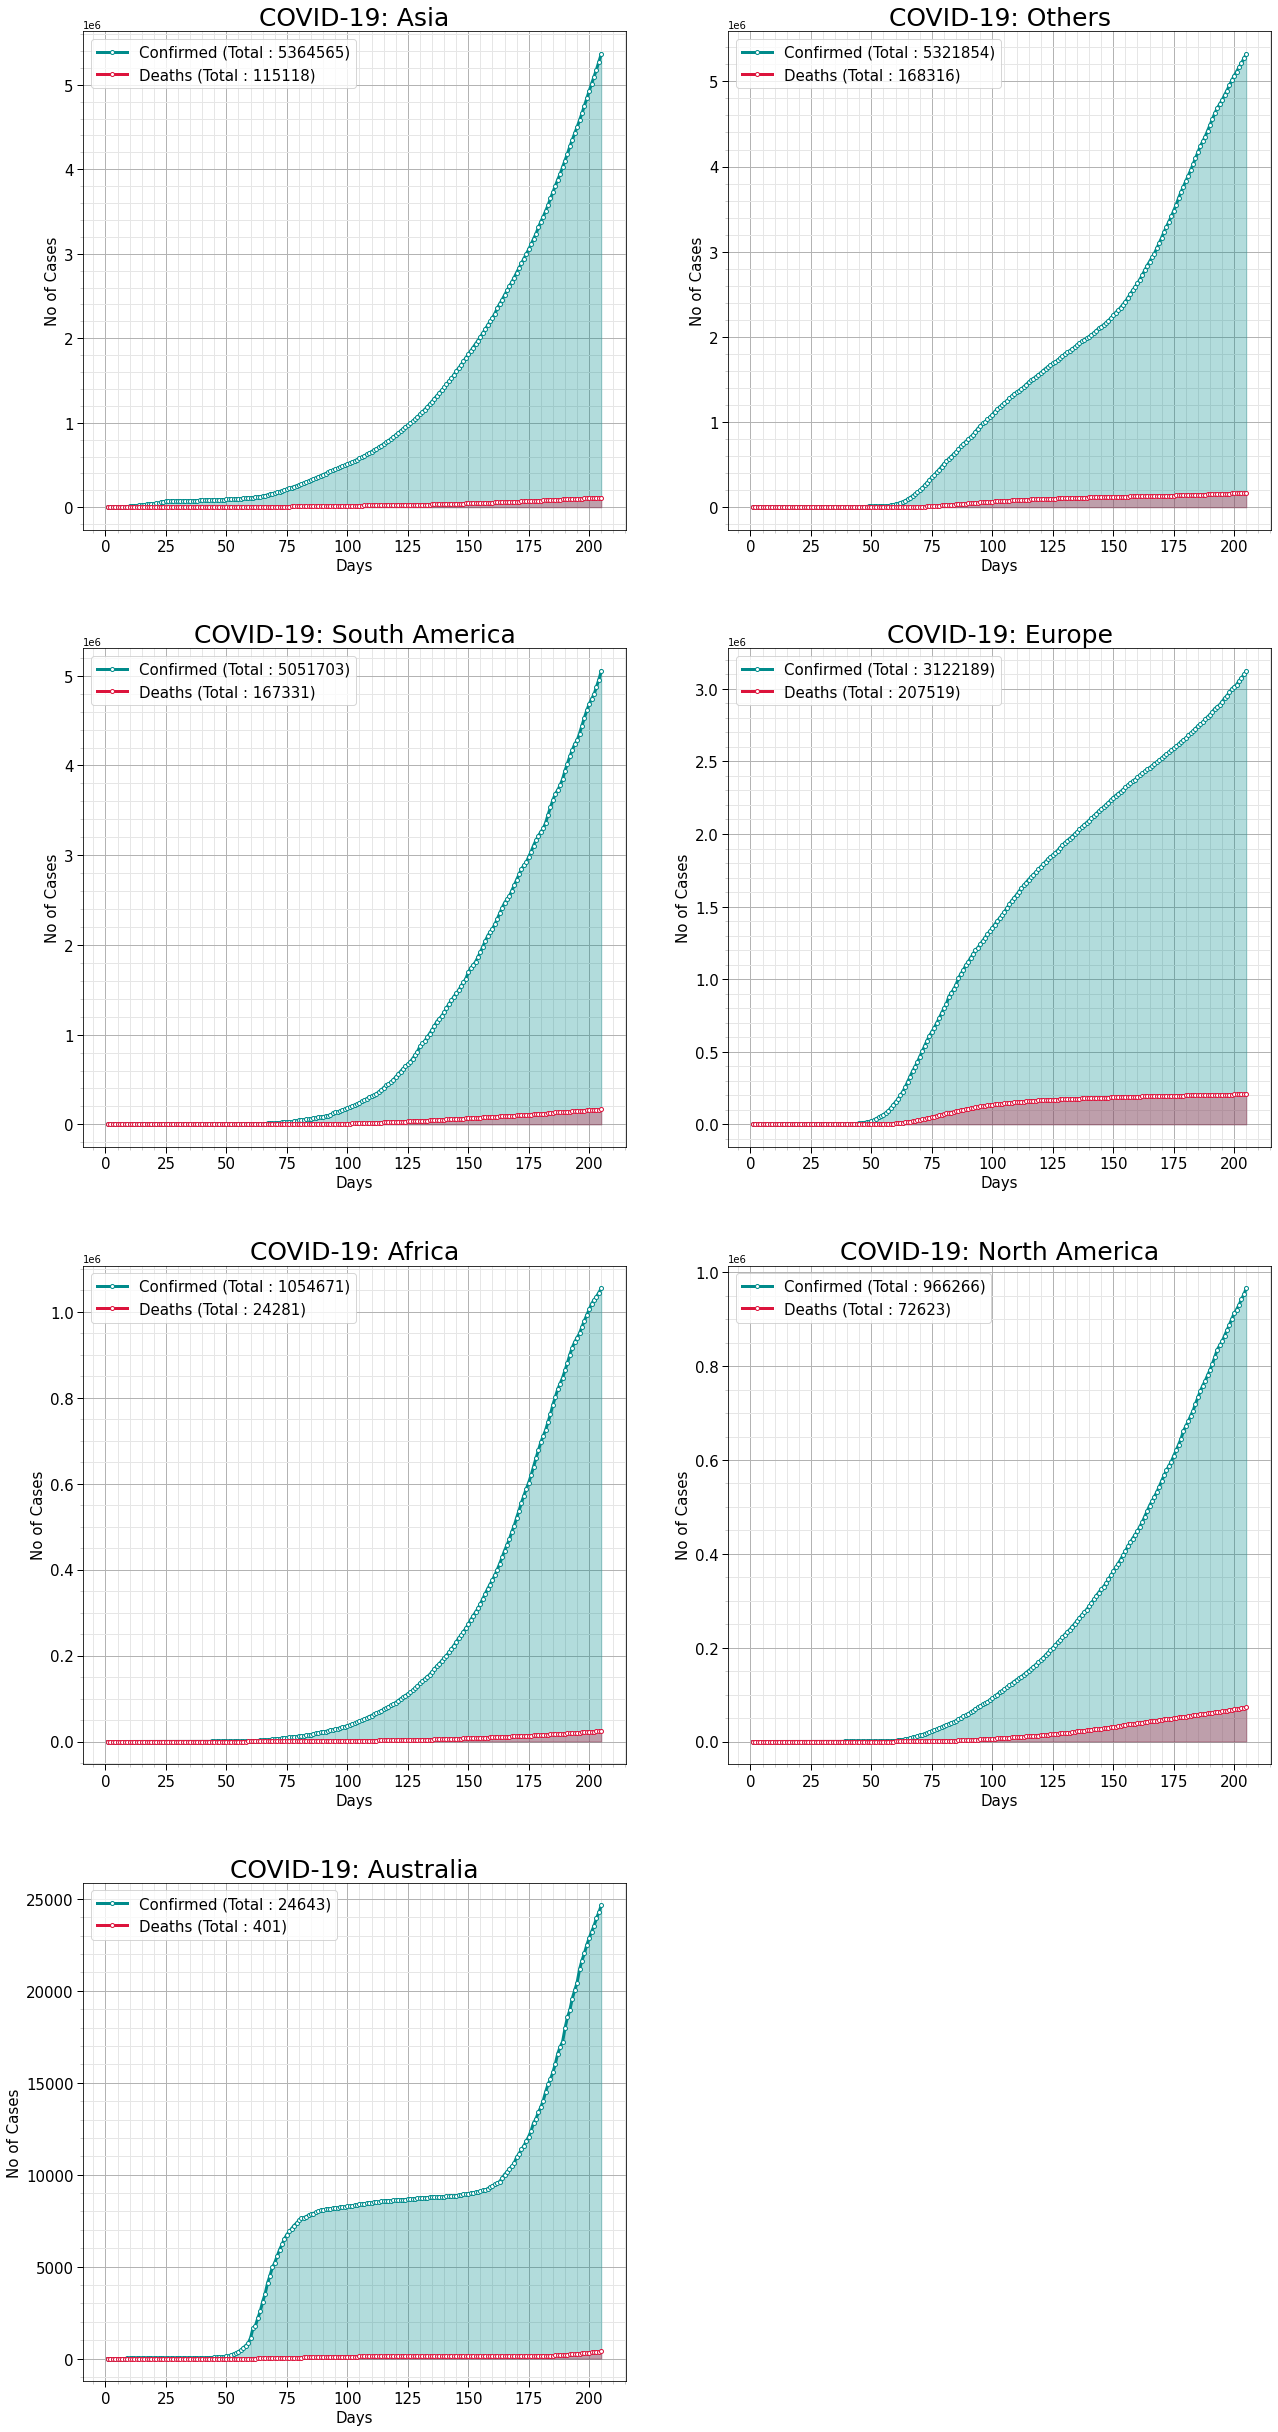

In [21]:
df_continents= df_confirmed.groupby(["continent"]).sum()
continents = df_continents.sort_values(df_continents.columns[-1],ascending = False).index

cols =2
rows = int(np.ceil(continents.shape[0]/cols))
f = plt.figure(figsize=(20,9*rows))
for i,continent in enumerate(continents):
    visualize_covid_cases(df_confirmed, df_deaths, continent = continent,figure = [f,rows,cols, i+1])

plt.show()

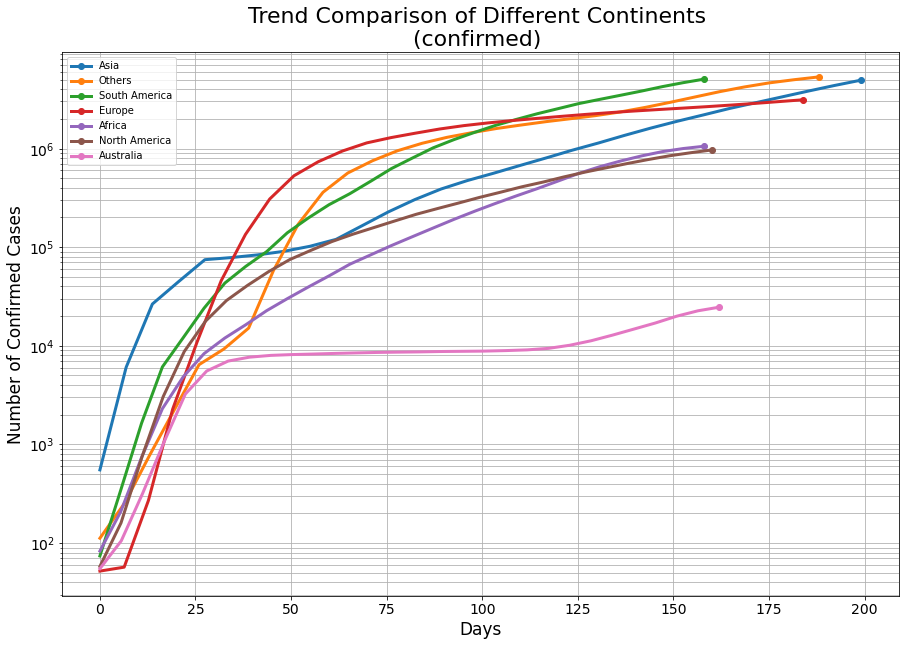

In [22]:
temp = df_confirmed.groupby('continent').sum().drop(["Lat","Long"],axis =1).sort_values(df_confirmed.columns[-1], ascending= False)

threshold = 50
f = plt.figure(figsize=(15,10))
ax = f.add_subplot(111)
for i,country in enumerate(temp.index):
    if i >= 10:
        break
    days = 200
    t = temp.loc[temp.index== country].values[0]
    t = t[t>threshold][:days]
     
    date = np.arange(0,len(t[:days]))
    xnew = np.linspace(date.min(), date.max(), 30)
    spl = make_interp_spline(date, t, k=1)  # type: BSpline
    power_smooth = spl(xnew)
    plt.plot(xnew,power_smooth,'-o',label = country,linewidth =3, markevery=[-1])

plt.tick_params(labelsize = 14)        
    


# plot Params
plt.xlabel("Days",fontsize=17)
plt.ylabel("Number of Confirmed Cases",fontsize=17)
plt.title("Trend Comparison of Different Continents \n(confirmed) ",fontsize=22)
plt.legend(loc = "upper left")
plt.yscale("log")
plt.grid(which="both")

plt.show()

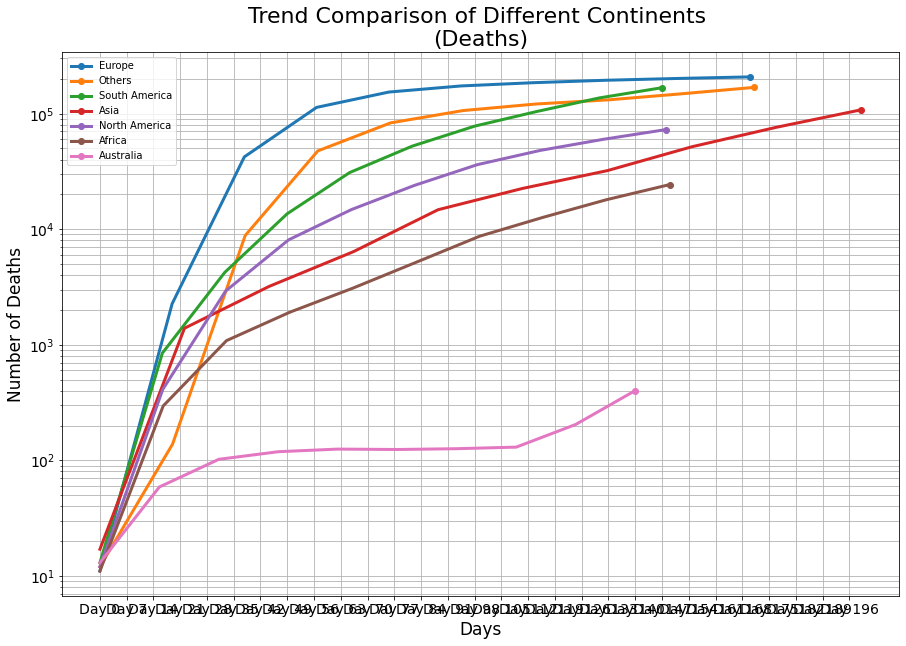

In [88]:
temp = df_deaths.groupby('continent').sum().drop(["Lat","Long"],axis =1).sort_values(df_deaths.columns[-1], ascending= False)

threshold = 10
f = plt.figure(figsize=(15,10))
ax = f.add_subplot(111)
for i,country in enumerate(temp.index):
    if i >= 10:
        break
    days = 200
    t = temp.loc[temp.index== country].values[0]
    t = t[t>threshold][:days]
     
    date = np.arange(0,len(t[:days]))
    xnew = np.linspace(date.min(), date.max(), 10)
    spl = make_interp_spline(date, t, k=1)  # type: BSpline
    power_smooth = spl(xnew)
    plt.plot(xnew,power_smooth,'-o',label = country,linewidth =3, markevery=[-1])


plt.tick_params(labelsize = 14)        
plt.xticks(np.arange(0,days,7),[ "Day "+str(i) for i in range(days)][::7])     

# plot Params
plt.xlabel("Days",fontsize=17)
plt.ylabel("Number of Deaths",fontsize=17)
plt.title("Trend Comparison of Different Continents \n(Deaths)",fontsize=22)
plt.legend(loc = "upper left")
plt.yscale("log")
plt.grid(which="both")

plt.show()

In [23]:
df_countries_cases.sort_values('Confirmed', ascending= False).style.background_gradient(cmap='Blues',subset=["Confirmed"])\
                        .background_gradient(cmap='Reds',subset=["Deaths"])\
                        .background_gradient(cmap='Greens',subset=["Recovered"])\
                        .background_gradient(cmap='Purples',subset=["Active"])\
                        .format("{:.0f}",subset=["Confirmed","Deaths","Recovered","Active"])

In [24]:
world_map = folium.Map(location=[10,0], tiles="cartodbpositron", zoom_start=2,max_zoom=6,min_zoom=2)
for i in range(0,len(df_confirmed)):
    folium.Circle(
        location=[df_confirmed.iloc[i]['Lat'], df_confirmed.iloc[i]['Long']],
        tooltip = "<h5 style='text-align:center;font-weight: bold'>"+df_confirmed.iloc[i]['country']+"</h5>"+
                    "<div style='text-align:center;'>"+str(np.nan_to_num(df_confirmed.iloc[i]['state']))+"</div>"+
                    "<hr style='margin:10px;'>"+
                    "<ul style='color: #444;list-style-type:circle;align-item:left;padding-left:20px;padding-right:20px'>"+
        "<li>Confirmed: "+str(df_confirmed.iloc[i,-1])+"</li>"+
        "<li>Deaths:   "+str(df_deaths.iloc[i,-1])+"</li>"+
        "<li>Mortality Rate:   "+str(np.round(df_deaths.iloc[i,-1]/(df_confirmed.iloc[i,-1]+1.00001)*100,2))+"</li>"+
        "</ul>",
        radius=(int((np.log(df_confirmed.iloc[i,-1]+1.00001)))+0.2)*50000,
        color='#ff6600',
        fill_color='#ff8533',
        fill=True).add_to(world_map)

world_map


In [25]:
temp_df = pd.DataFrame(df_countries_cases['Confirmed'])
temp_df = temp_df.reset_index()
fig = px.choropleth(temp_df, locations="country",
                    color=np.log10(temp_df["Confirmed"]), # lifeExp is a column of gapminder
                    hover_name="country", # column to add to hover information
                    hover_data=["Confirmed"],
                    color_continuous_scale=px.colors.sequential.Plasma,locationmode="country names")
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(title_text="Confirmed Cases Heat Map (Log Scale)")
fig.update_coloraxes(colorbar_title="Confirmed Cases(Log Scale)",colorscale="Blues")
# fig.to_image("Global Heat Map confirmed.png")
fig.show()

In [26]:
temp_df = pd.DataFrame(df_countries_cases['Deaths'])
temp_df = temp_df.reset_index()
fig = px.choropleth(temp_df, locations="country",
                    color=np.log10(temp_df["Deaths"]+1), # lifeExp is a column of gapminder
                    hover_name="country", # column to add to hover information
                    hover_data=["Deaths"],
                    color_continuous_scale=px.colors.sequential.Plasma,locationmode="country names")
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(title_text="Deaths Heat Map (Log Scale)")
fig.update_coloraxes(colorbar_title="Deaths (Log Scale)",colorscale="Reds")
# fig.to_image("Global Heat Map deaths.png")
fig.show()

In [27]:
temp_df = pd.DataFrame(df_countries_cases['Recovered'])
temp_df = temp_df.reset_index()
fig = px.choropleth(temp_df, locations="country",
                    color=np.log10(temp_df.iloc[:,-1]+1), # lifeExp is a column of gapminder
                    hover_name="country", # column to add to hover information
                    hover_data=["Recovered"],
                    color_continuous_scale=px.colors.sequential.Plasma,locationmode="country names")
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(title_text="Recovered Heat Map (Log Scale)")
fig.update_coloraxes(colorbar_title="Recovered",colorscale="Greens")

fig.show()

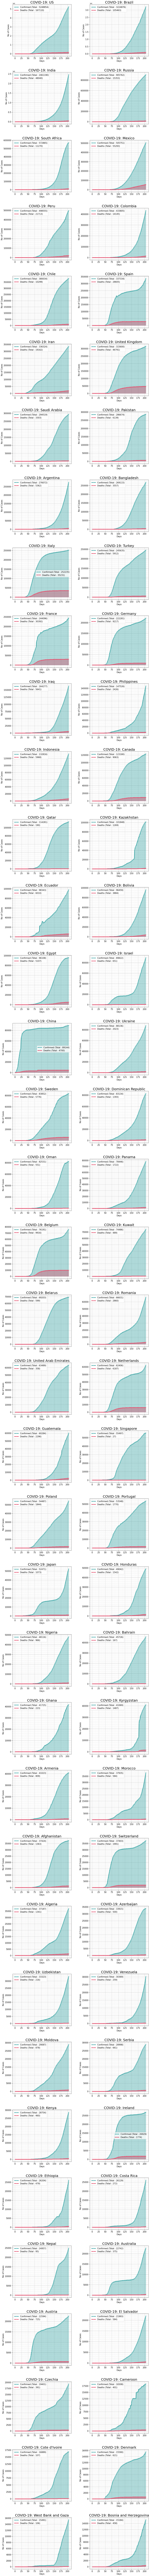

In [28]:
df_countries = df_confirmed.groupby(["country"]).sum()
df_countries = df_countries.sort_values(df_countries.columns[-1],ascending = False)
countries = df_countries[df_countries[df_countries.columns[-1]] >= 15000].index

cols =2
rows = int(np.ceil(countries.shape[0]/cols))
f = plt.figure(figsize=(18,7*rows))
for i,country in enumerate(countries):
    visualize_covid_cases(df_confirmed, df_deaths,country = country,figure = [f,rows,cols, i+1])

plt.show()

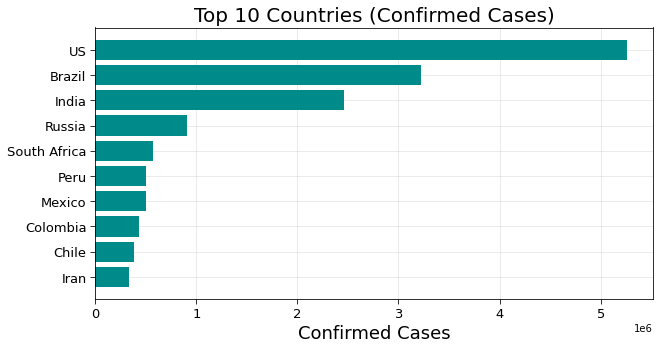

In [29]:
f = plt.figure(figsize=(10,5))
plt.axes(axisbelow=True)
plt.barh(df_countries_cases.sort_values('Confirmed')["Confirmed"].index[-10:],df_countries_cases.sort_values('Confirmed')["Confirmed"].values[-10:],color="darkcyan")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Confirmed Cases",fontsize=18)
plt.title("Top 10 Countries (Confirmed Cases)",fontsize=20)
plt.grid(alpha=0.3)

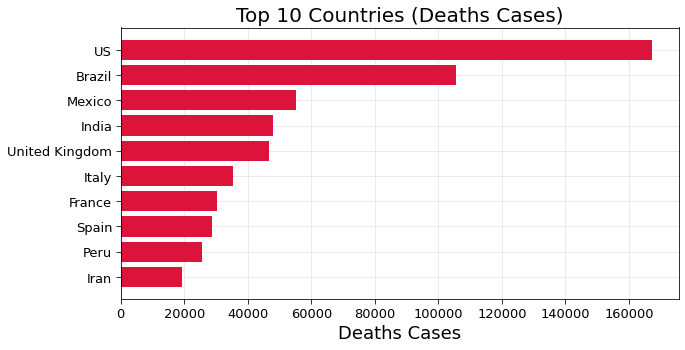

In [30]:
f = plt.figure(figsize=(10,5))
plt.axes(axisbelow=True)
plt.barh(df_countries_cases.sort_values('Deaths')["Deaths"].index[-10:],df_countries_cases.sort_values('Deaths')["Deaths"].values[-10:],color="crimson")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Deaths Cases",fontsize=18)
plt.title("Top 10 Countries (Deaths Cases)",fontsize=20)
plt.grid(alpha=0.3,which='both')


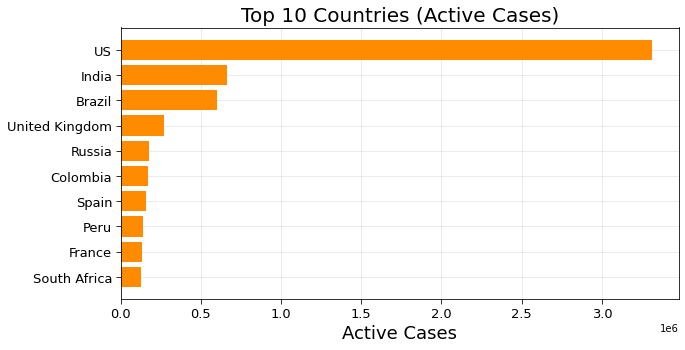

In [31]:
f = plt.figure(figsize=(10,5))

plt.axes(axisbelow=True)
plt.barh(df_countries_cases.sort_values('Active')["Active"].index[-10:],df_countries_cases.sort_values('Active')["Active"].values[-10:],color="darkorange")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Active Cases",fontsize=18)
plt.title("Top 10 Countries (Active Cases)",fontsize=20)
plt.grid(alpha=0.3,which='both')

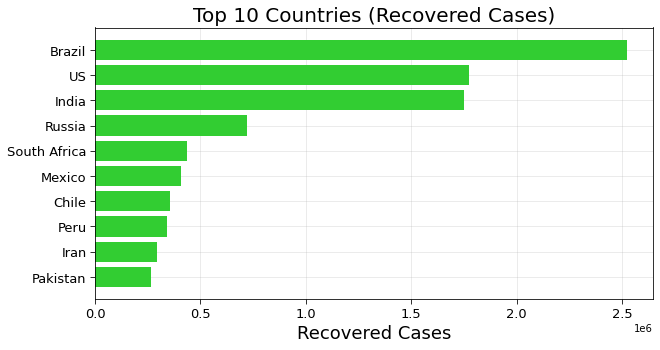

In [32]:
f = plt.figure(figsize=(10,5))

plt.axes(axisbelow=True)
plt.barh(df_countries_cases.sort_values('Recovered')["Recovered"].index[-10:],df_countries_cases.sort_values('Recovered')["Recovered"].values[-10:],color="limegreen")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Recovered Cases",fontsize=18)
plt.title("Top 10 Countries (Recovered Cases)",fontsize=20)
plt.grid(alpha=0.3,which='both')

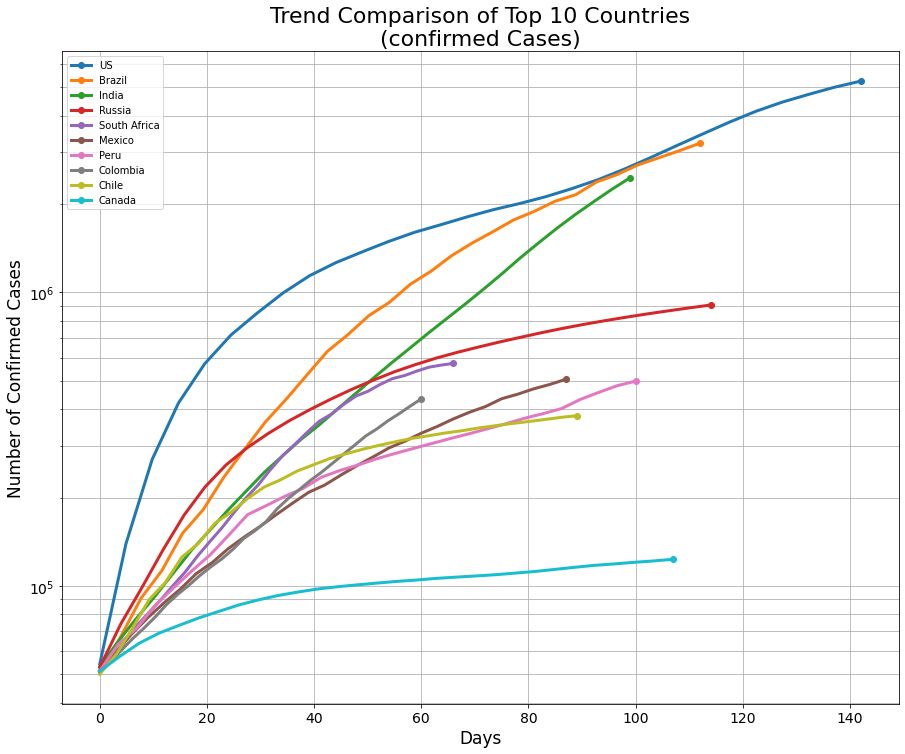

In [40]:
temp = df_confirmed.groupby('country').sum().drop(["Lat","Long"],axis =1).sort_values(df_confirmed.columns[-1], ascending= False)

threshold = 50000
f = plt.figure(figsize=(15,12))
for i,country in enumerate(temp.index):
    if i >= 9:
        if country != "Canada" and country != "India" :
            continue
    days = 200
    t = temp.loc[temp.index== country].values[0]
    t = t[t>threshold][:days]
     
    date = np.arange(0,len(t[:days]))
    xnew = np.linspace(date.min(), date.max(), 30)
    spl = make_interp_spline(date, t, k=1)  # type: BSpline
    power_smooth = spl(xnew)
    plt.plot(xnew,power_smooth,'-o',label = country,linewidth =3, markevery=[-1])

plt.tick_params(labelsize = 14)        
     

# plot Params
plt.xlabel("Days",fontsize=17)
plt.ylabel("Number of Confirmed Cases",fontsize=17)
plt.title("Trend Comparison of Top 10 Countries\n (confirmed Cases) ",fontsize=22)
plt.legend(loc = "upper left")
plt.yscale("log")
plt.grid(which="both")

plt.show()

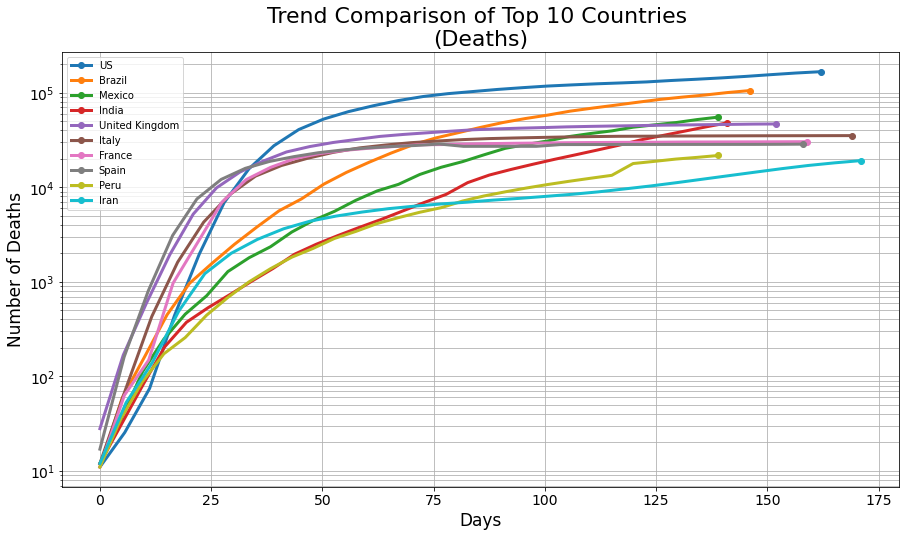

In [41]:
temp = df_deaths.groupby('country').sum().drop(["Lat","Long"],axis =1).sort_values(df_deaths.columns[-1], ascending= False)

threshold = 10
f = plt.figure(figsize=(15,8))
for i,country in enumerate(temp.index):
    if i >= 10:
        break
    days = 200
    t = temp.loc[temp.index== country].values[0]
    t = t[t>threshold][:days]
     
    date = np.arange(0,len(t[:days]))
    xnew = np.linspace(date.min(), date.max(), 30)
    spl = make_interp_spline(date, t, k=1)  # type: BSpline
    power_smooth = spl(xnew)
    plt.plot(xnew,power_smooth,'-o',label = country,linewidth =3, markevery=[-1])

plt.tick_params(labelsize = 14)        
  

# plot Params
plt.xlabel("Days",fontsize=17)
plt.ylabel("Number of Deaths",fontsize=17)
plt.title("Trend Comparison of Top 10 Countries \n(Deaths)",fontsize=22)
plt.legend(loc = "upper left")
plt.yscale("log")
plt.grid(which="both")

plt.show()

NameError: name 'd' is not defined

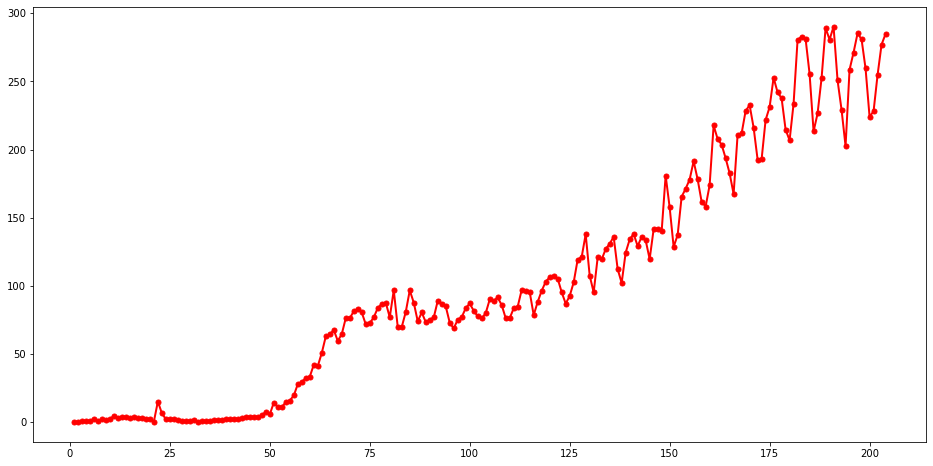

In [42]:
thousand = 1000
prediction_days = 0
# Data
temp_data = np.nan_to_num(df_confirmed.sum()[5:].diff())


# Plot
f = plt.figure(figsize=(16,8))
ax = f.add_subplot(111)


date = np.arange(0,len(temp_data))

marker_style = dict(linewidth=2, linestyle='-', marker='o',markersize=5)
plt.plot(date,temp_data/thousand,"-.",color="red",**marker_style)


nextdays = [(datetime.strptime(d[-1],'%d %b')+timedelta(days=i)).strftime("%d %b")]
total =d+nextdays

# X-axis
plt.xticks(list(np.arange(0,len(total),int(len(total)/5))),total[:-1:int(len(total)/5)]+[total[-1]])

# Tick-Parameters
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.tick_params(which='both', width=1,labelsize=12)
ax.tick_params(which='major', length=6)
ax.tick_params(which='minor', length=3, color='0.8')

# Grid
plt.grid(lw = 1, ls = '-', c = "0.85", which = 'major')
plt.grid(lw = 1, ls = '-', c = "0.95", which = 'minor')

# Plot Title
plt.title("COVID-19 Global Daily New Confirmed Cases",{'fontsize':22})

# Axis Lable
plt.xlabel("Date",fontsize =18)
plt.ylabel("Number of Daily Confirmed Cases (Thousand)",fontsize =18)

# plt.yscale("log")
plt.tick_params(labelsize = 13) 
plt.savefig(out+"daily confirmed cases global.png")
plt.show()

NameError: name 'd' is not defined

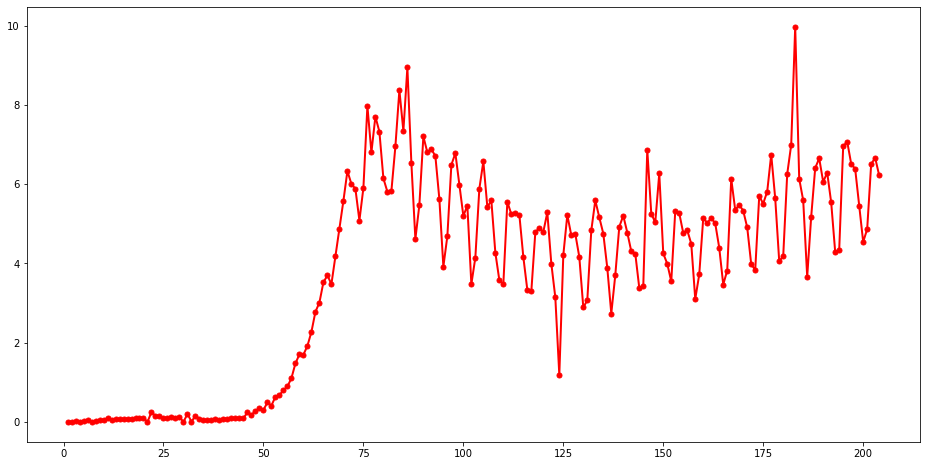

In [43]:
# Data
temp_data = np.nan_to_num(df_deaths.sum()[5:].diff())


# Plot
f = plt.figure(figsize=(16,8))
ax = f.add_subplot(111)


date = np.arange(0,len(temp_data))

marker_style = dict(linewidth=2, linestyle='-', marker='o',markersize=5)
plt.plot(date,temp_data/thousand,"-.",color="red",**marker_style)


nextdays = [(datetime.strptime(d[-1],'%d %b')+timedelta(days=i)).strftime("%d %b") for i in range(1,prediction_days+1)]
total =d+nextdays

# X-axis
plt.xticks(list(np.arange(0,len(total),int(len(total)/5))),total[:-1:int(len(total)/5)]+[total[-1]])

# Tick-Parameters
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.tick_params(which='both', width=1,labelsize=14)
ax.tick_params(which='major', length=6)
ax.tick_params(which='minor', length=3, color='0.8')

# Grid
plt.grid(lw = 1, ls = '-', c = "0.85", which = 'major')
plt.grid(lw = 1, ls = '-', c = "0.95", which = 'minor')

# Plot Title
plt.title("COVID-19 Global Daily Deaths Reported",{'fontsize':22})

# Axis Lable
plt.xlabel("Date",fontsize =18)
plt.ylabel("Number of Daily Deaths Reported (Thousand)",fontsize =18)

# plt.yscale("log")
plt.savefig(out+"daily deaths cases Global.png")
plt.show()

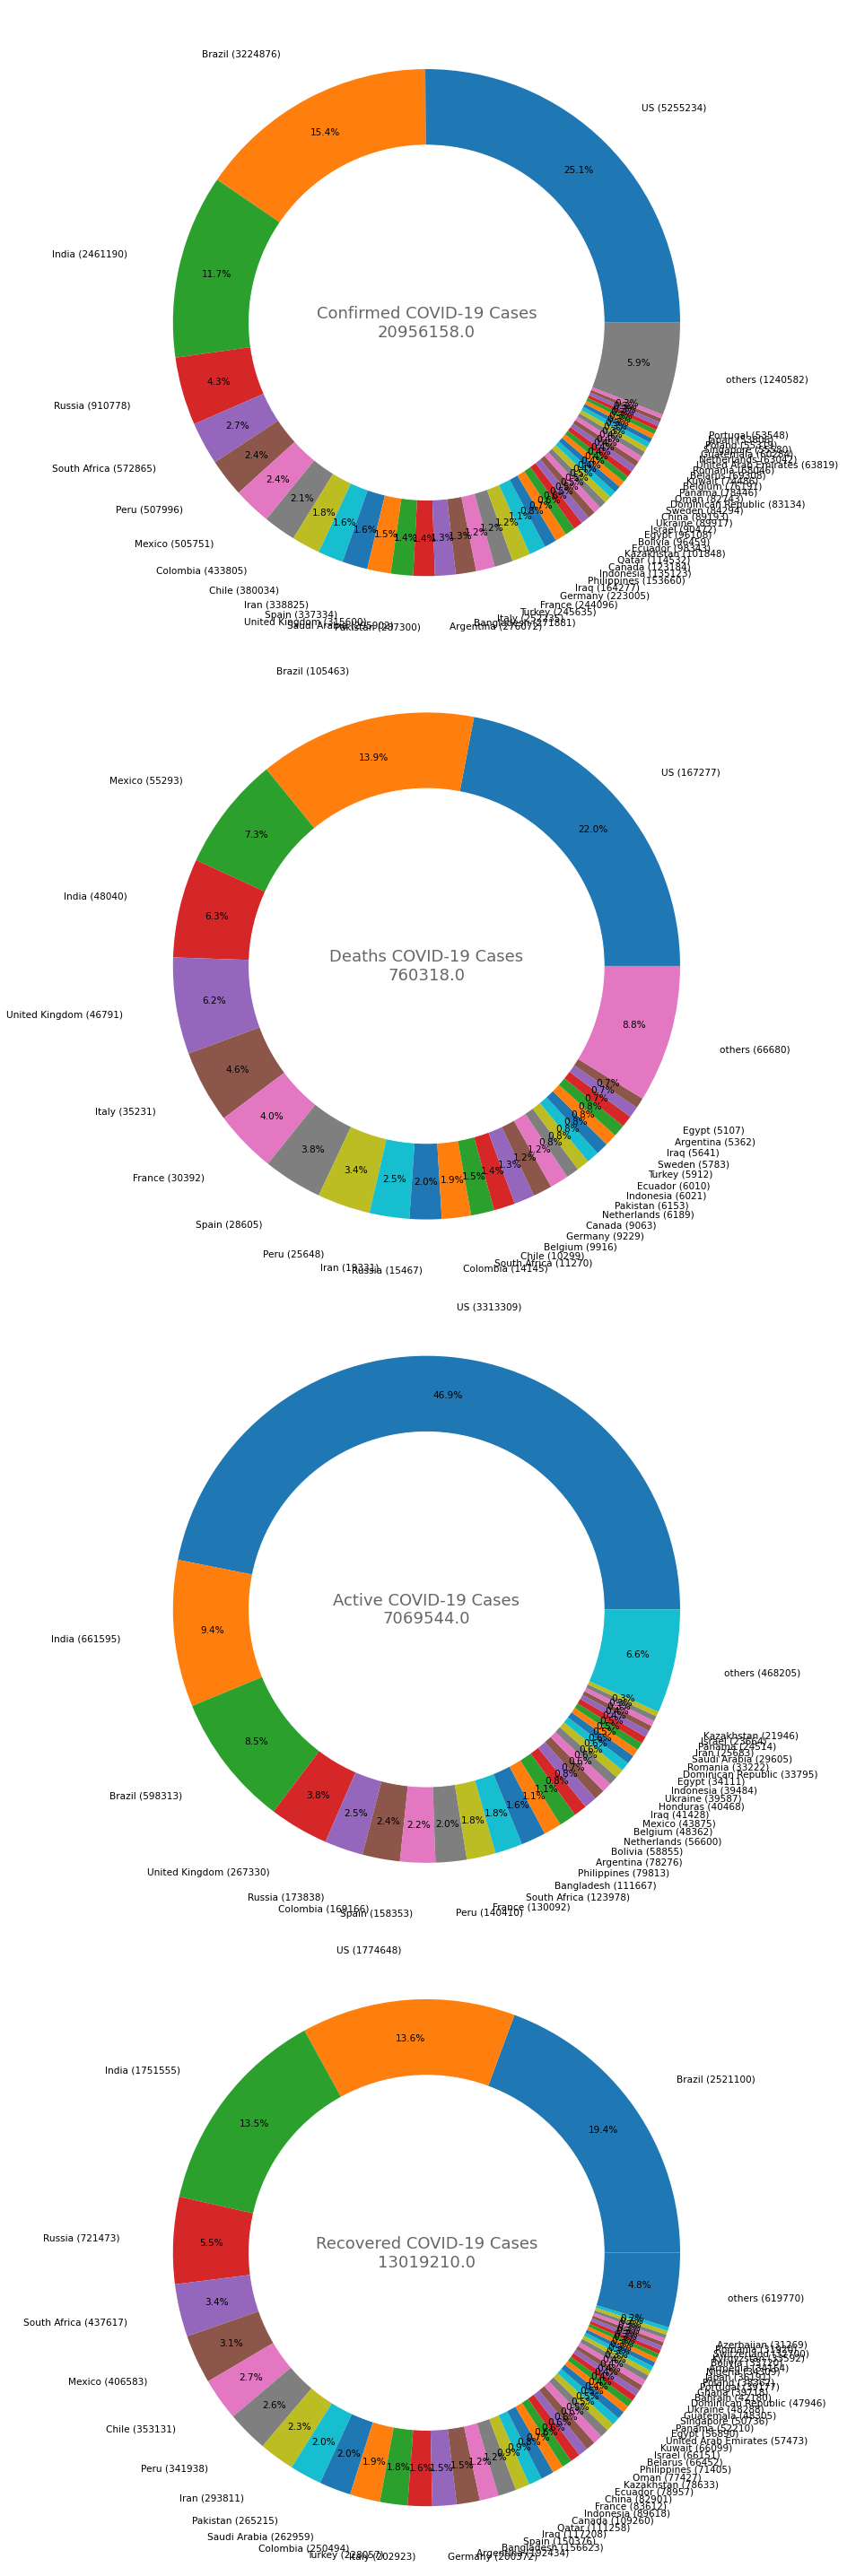

In [44]:
rows = 4
f = plt.figure(figsize=(15,10*rows))

stats = [df_covid19.loc[:,['country','Confirmed']],df_covid19.loc[:,['country','Deaths']],df_covid19.loc[:,['country','Active']],df_covid19.loc[:,['country','Recovered']]]
label = ["Confirmed","Deaths","Active","Recovered"]
threshold = [50000,5000,20000,30000]
for i, stat in enumerate(stats):
    plt.tight_layout()
    df_countries = stat.groupby(["country"]).sum()
    df_countries = df_countries.sort_values(df_countries.columns[-1],ascending= False)
    others = df_countries[df_countries[df_countries.columns[-1]] < threshold[i] ].sum()[-1]
    df_countries = df_countries[df_countries[df_countries.columns[-1]] > threshold[i]]
    df_countries = df_countries[df_countries.columns[-1]]
    df_countries["others"] = others
    labels = [df_countries.index[i] +" (" + str(int(df_countries[i])) +") "for i in range(df_countries.shape[0])]

    ax = f.add_subplot(rows,1,i+1)
    plt.pie(df_countries, labels=labels,autopct='%1.1f%%',pctdistance=0.85, labeldistance=1.2,textprops = {'fontsize':10.5})
    my_circle=plt.Circle( (0,0), 0.7, color='white')
    p=plt.gcf()
    p.gca().add_artist(my_circle)
    plt.text(0.5,0.5,label[i]+ " COVID-19 Cases\n"+str(stat.sum().values[1]), horizontalalignment='center',verticalalignment='center',transform=ax.transAxes, size=18, alpha = 0.6)


plt.show()
